#  spectra holo at AuxTel for Scan data

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : March 29th  2022



- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

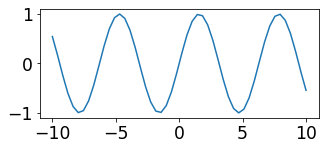

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [7]:
string_date

'2022-03-30'

In [8]:
from iminuit import Minuit
import iminuit

In [9]:
iminuit.__version__

'2.2.0'

In [10]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [11]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [12]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [13]:
from time import sleep

In [14]:
from astropy.time import Time
import astropy.units as u

# Function

In [15]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [16]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [18]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [19]:
# path index for each month
DATE="20220317"

In [20]:
version="v5.0"

# Path

In [21]:
HOSTCC=True

In [22]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022/2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [23]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317'

In [24]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Mar 28 11:04 2022031700237
drwxrws--- 1 dagoret lsst 2 Mar 29 18:29 2022031700238
drwxrws--- 1 dagoret lsst 2 Mar 29 18:47 2022031700244
drwxrws--- 1 dagoret lsst 2 Mar 29 19:06 2022031700245
drwxrws--- 1 dagoret lsst 2 Mar 29 19:27 2022031700251
drwxrws--- 1 dagoret lsst 2 Mar 29 19:48 2022031700252
drwxrws--- 1 dagoret lsst 2 Mar 29 20:10 2022031700258
drwxrws--- 1 dagoret lsst 2 Mar 29 20:27 2022031700259
drwxrws--- 1 dagoret lsst 2 Mar 29 20:48 2022031700265
drwxrws--- 1 dagoret lsst 2 Mar 29 21:05 2022031700266
drwxrws--- 1 dagoret lsst 2 Mar 29 21:27 2022031700272
drwxrws--- 1 dagoret lsst 2 Mar 29 21:46 2022031700273
drwxrws--- 1 dagoret lsst 2 Mar 29 22:02 2022031700279
drwxrws--- 1 dagoret lsst 2 Mar 29 22:22 2022031700280
drwxrws--- 1 dagoret lsst 2 Mar 29 22:40 2022031700286
drwxrws--- 1 dagoret lsst 2 Mar 29 22:56 2022031700287
drwxrws--- 1 dagoret lsst 2 Mar 29 23:11 2022031700293
drwxrws--- 1 dagoret lsst 2 Mar 29 23:33 2022031700294
dr

In [25]:

# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
# special for scan in XY
config="./config/auxtel_scanXY.ini"

# Logbook for file selection

In [26]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [27]:
df=pd.read_csv(filename_logbook,index_col=0)

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                               path  \
0   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
1   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
2   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
3   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
4   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
5   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
6   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
7   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
8   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
9   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
10  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
11  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
12  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
13  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
14  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
15  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
16  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
17  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
18  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
19  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
20  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
21  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
22  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
23  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
24  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
25  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
26  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
27  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
28  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
29  /sps/lsst/groups/auxtel/data/20

# Selection of input file

In [30]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [31]:
df_good=df
df_good["quality"] = 1

In [32]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

# Selection of Spectractor output files

In [33]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [34]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
        
        
        
        
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237', '2022031700238', '2022031700244', '2022031700245', '2022031700251', '2022031700252', '2022031700258', '2022031700259', '2022031700265', '2022031700266', '2022031700272', '2022031700273', '2022031700279', '2022031700280', '2022031700286', '2022031700287', '2022031700293', '2022031700294', '2022031700300', '2022031700301', '2022031700309', '2022031700310', '2022031700316', '2022031700317', '2022031700323', '2022031700324', '2022031700330', '2022031700331', '2022031700337', '2022031700338', '2022031700344', '2022031700345', '2022031700351', '2022031700352', '2022031700358', '2022031700359', '2022031700365', '2022031700366', '2022031700372', '2022031700373', '2022031700379', '2022031700380', '2022031700386', '2022031700387', '2022031700393', '2022031700394', '2022031700400', '2022031700401', '2022031700407', '2022031700408', 'basespec', 'plots']
00237
---------------------------------------------
2022031700237  	   00237
2022031700237 is a directory


In [35]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700244/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700245/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700251/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700252/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700258/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700259/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700265/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700266/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/202203170027

In [36]:
! ls /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220316/2022031600366/basespec

exposure_2022031600366_postisrccd_lines.csv
exposure_2022031600366_postisrccd_spectrogram.fits
exposure_2022031600366_postisrccd_spectrum.fits
exposure_2022031600366_postisrccd_table.csv


In [37]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [38]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700237_postisrccd_spectrum.fits']

In [39]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700237_postisrccd_spectrogram.fits']

In [40]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700237_postisrccd_lines.csv']

In [41]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700237_postisrccd_table.csv']

# Selection of good spectra

In [42]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [43]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

0 ) exposure_2022031700237_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1
1 ) exposure_2022031700237_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700238/basespec/exposure_2022031700237_postisrccd_spectrum.fits
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_2 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1
2 ) exposure_2022031700238_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/202203170

/tmp/ipykernel_6927/1338375889.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
21 ) exposure_2022031700301_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317/2022031700301/basespec/exposure_2022031700301_postisrccd_spectrum.fits
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_22 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
22 ) exposure_2022031700309_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/20220317

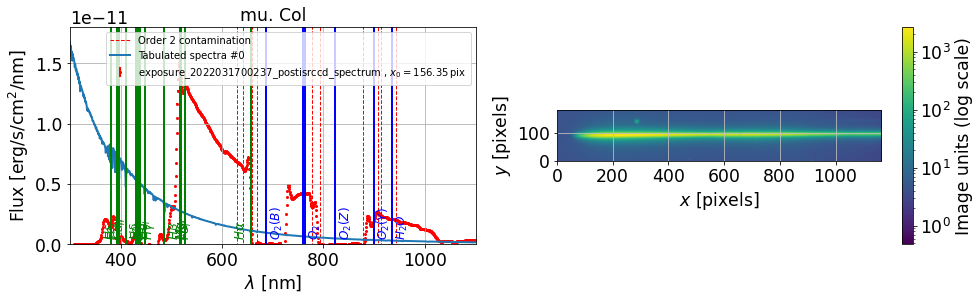

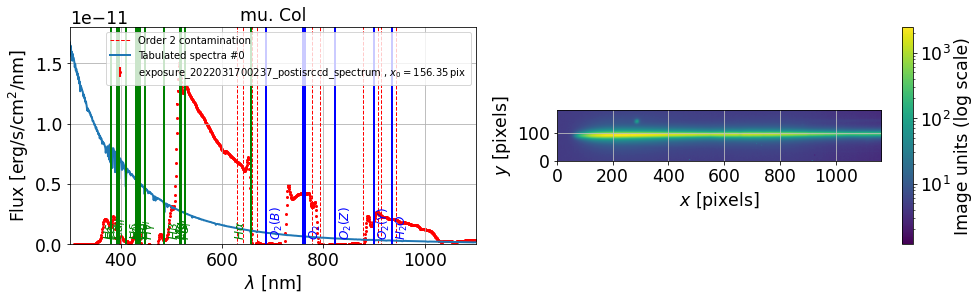

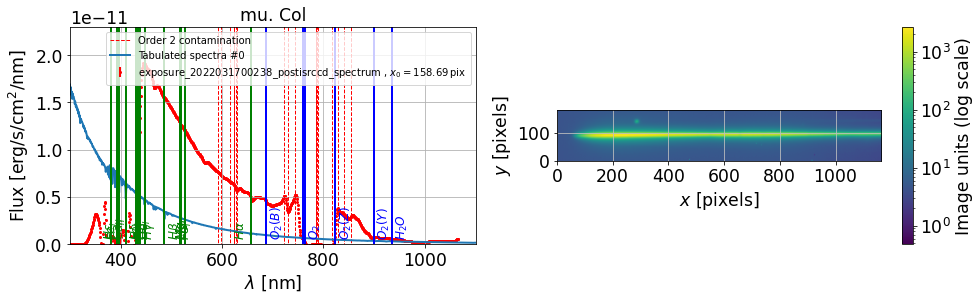

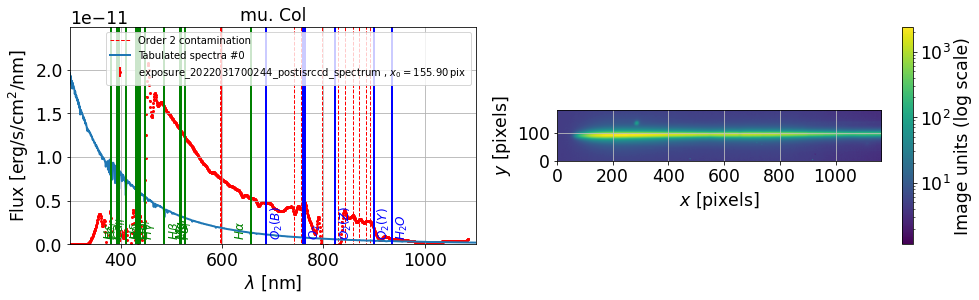

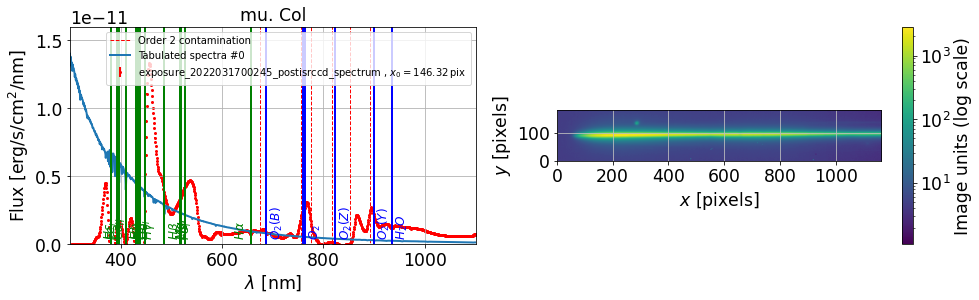

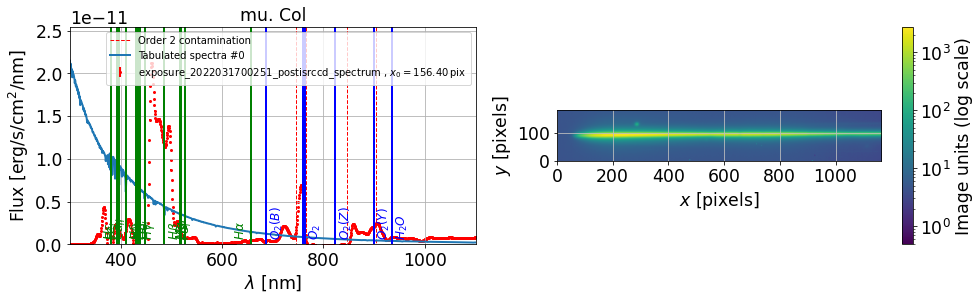

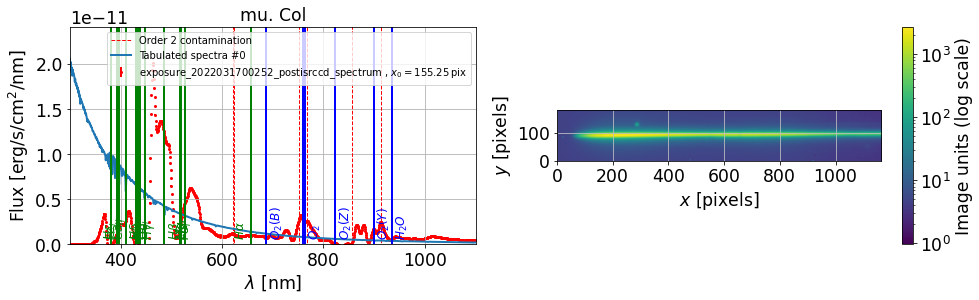

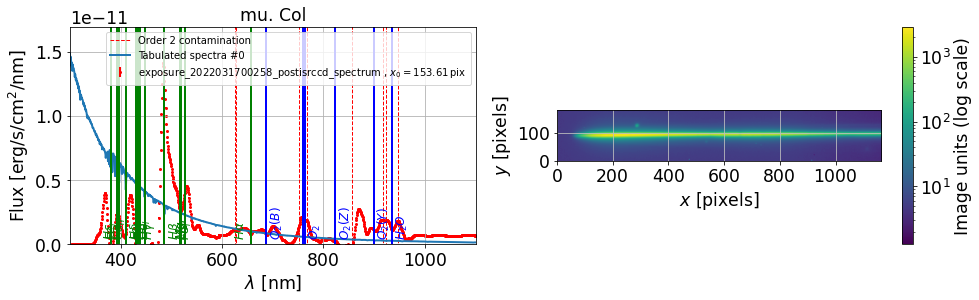

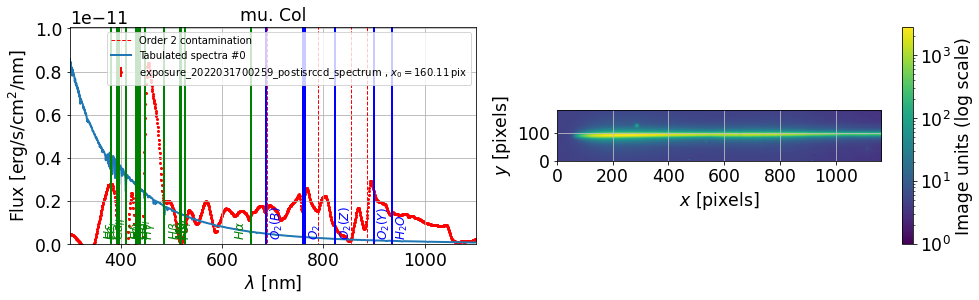

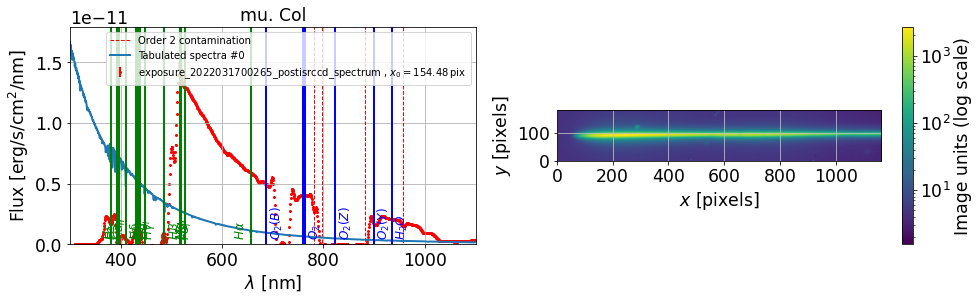

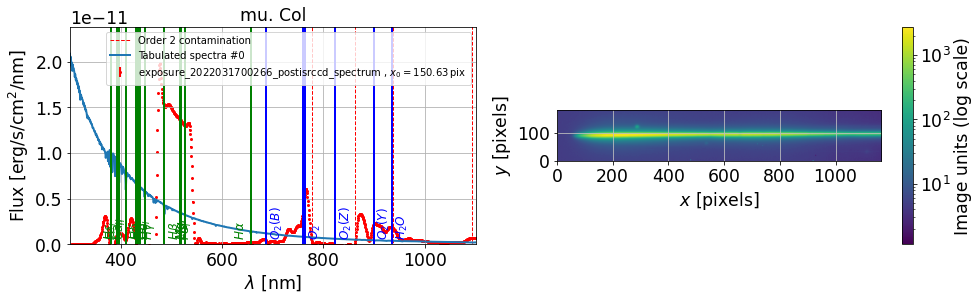

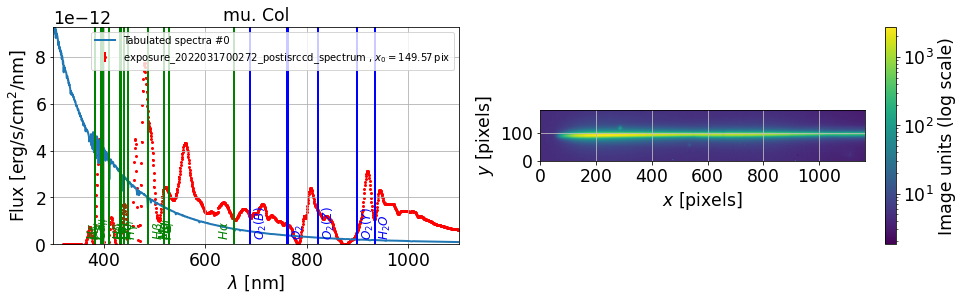

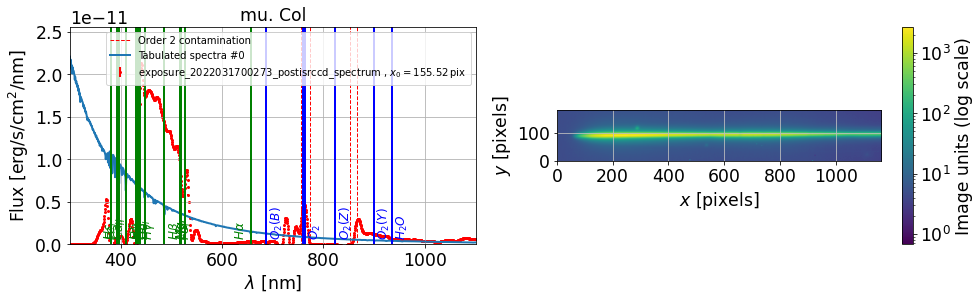

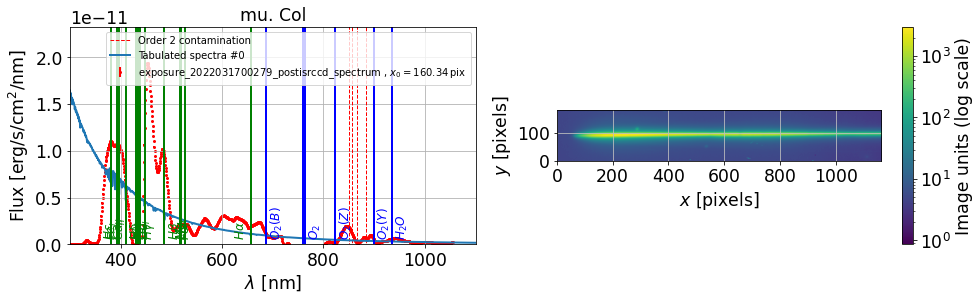

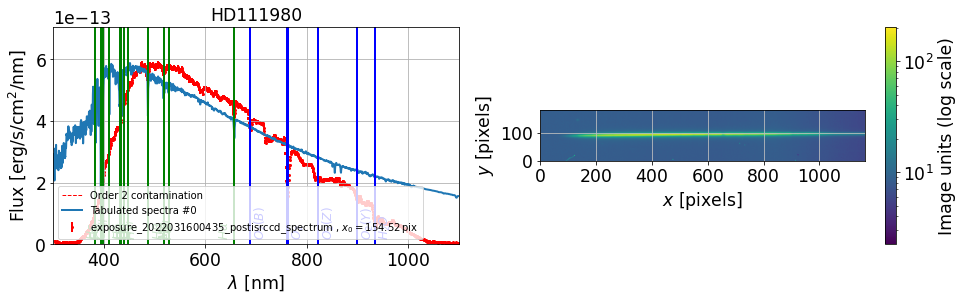

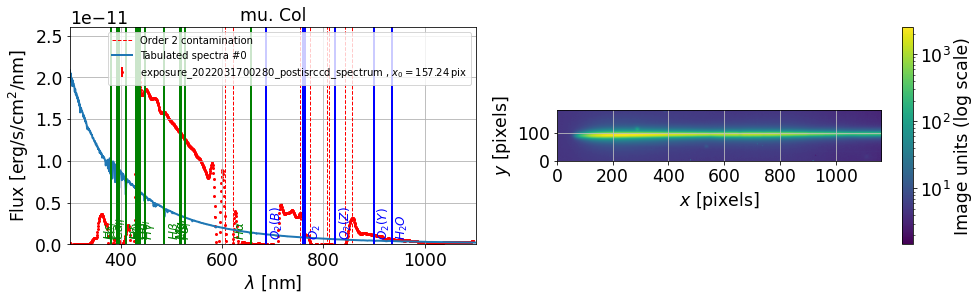

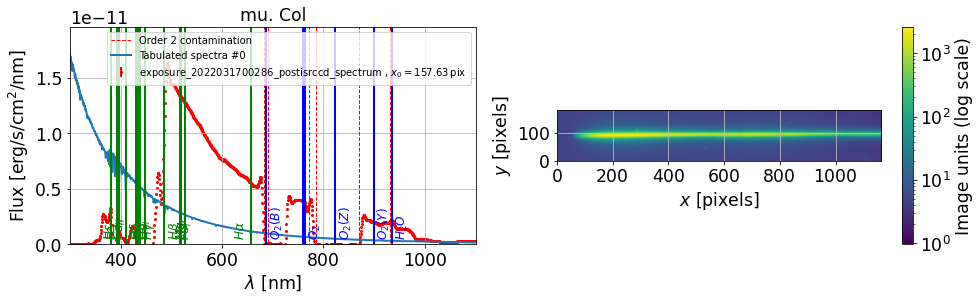

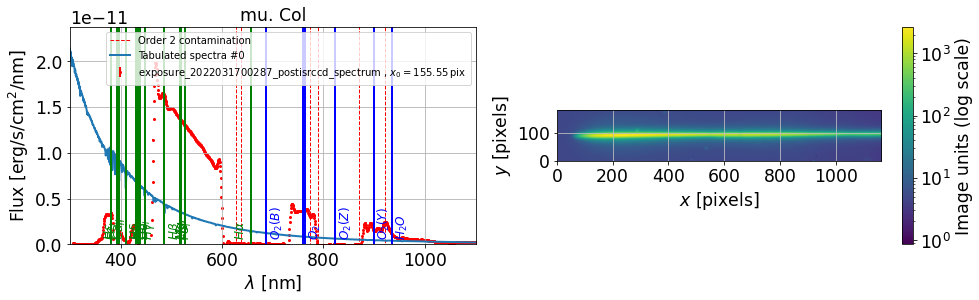

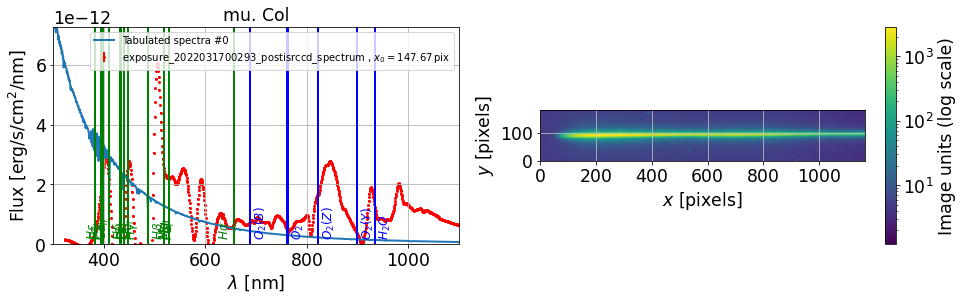

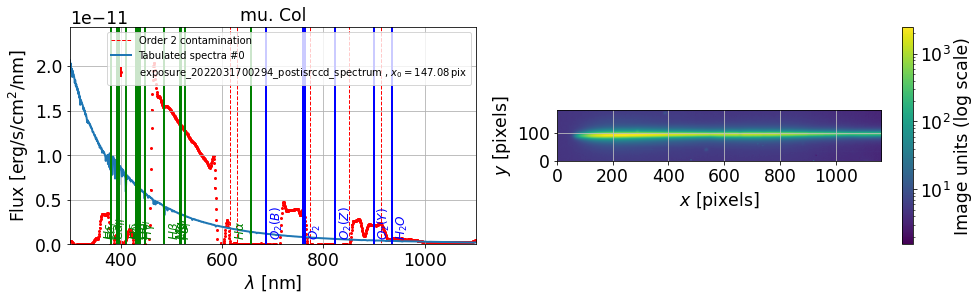

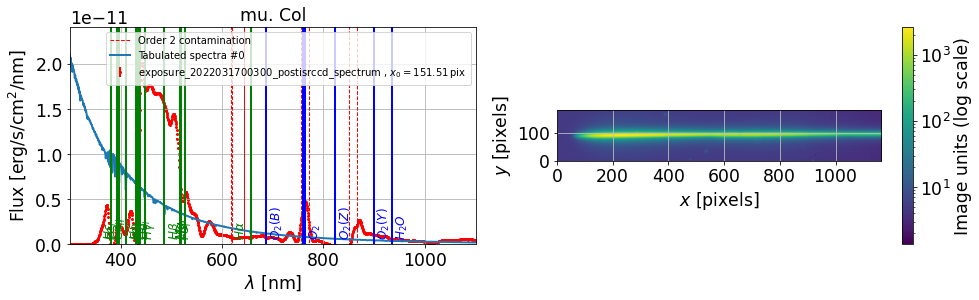

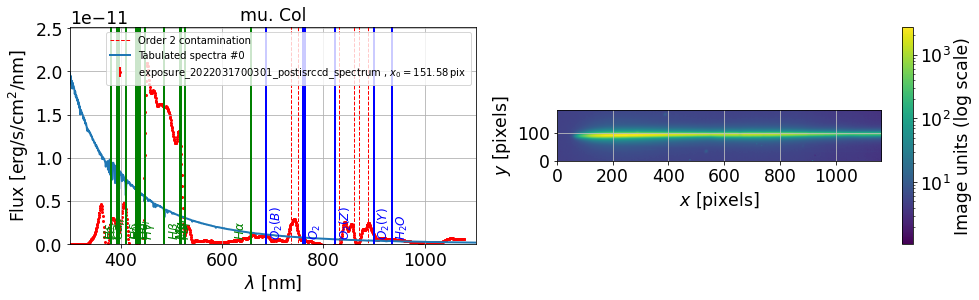

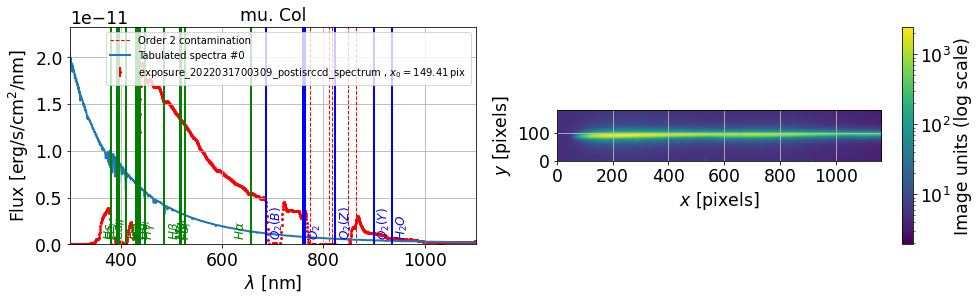

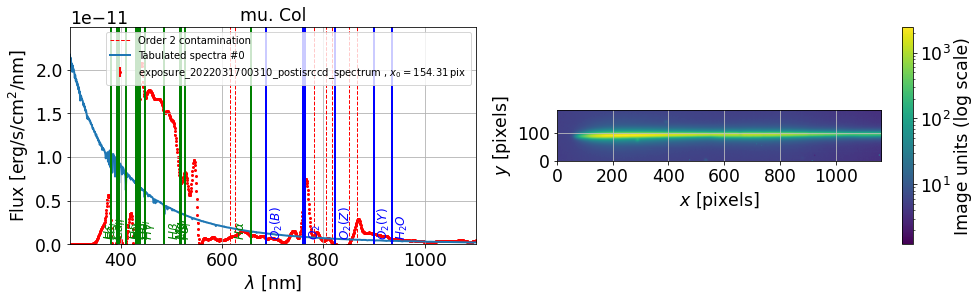

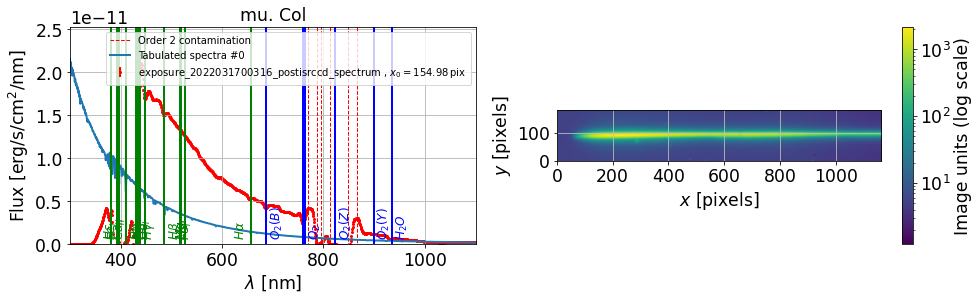

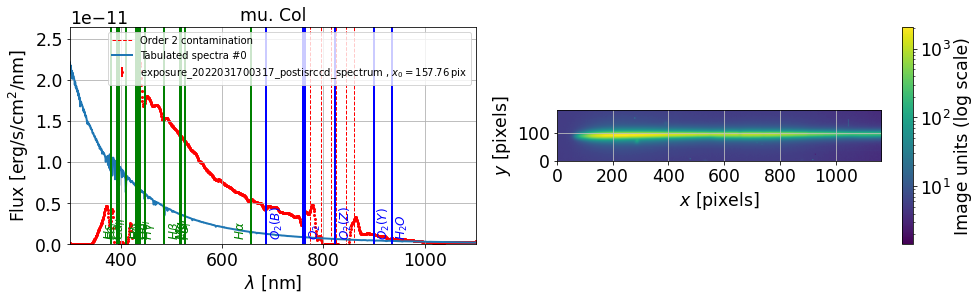

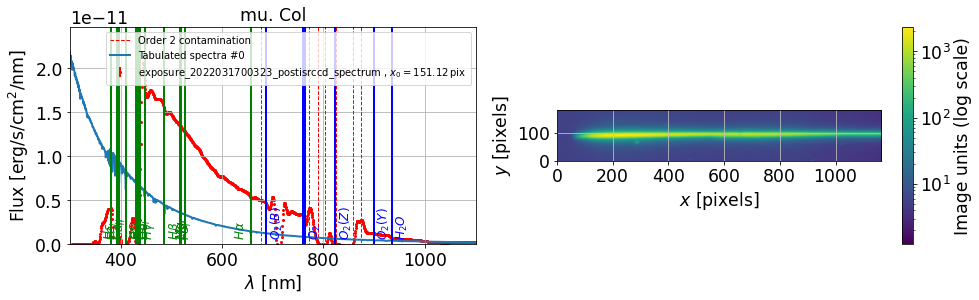

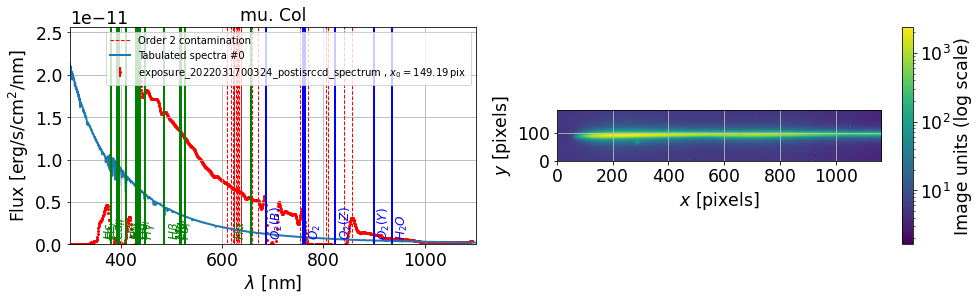

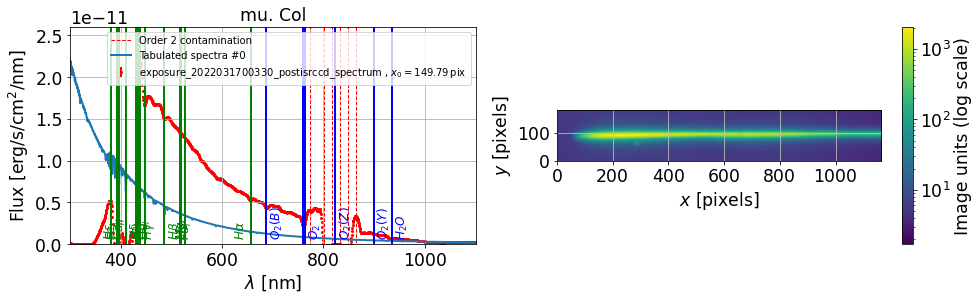

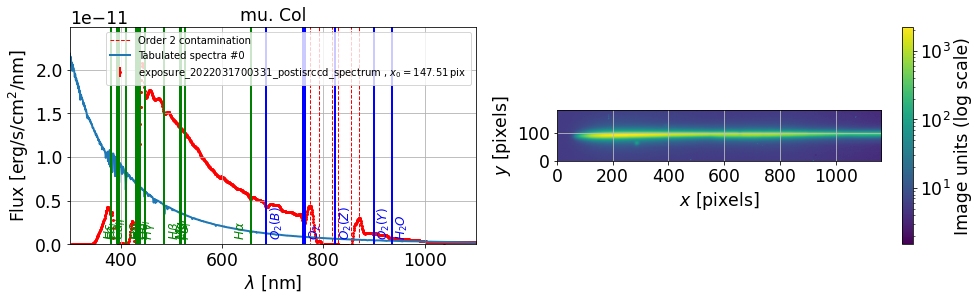

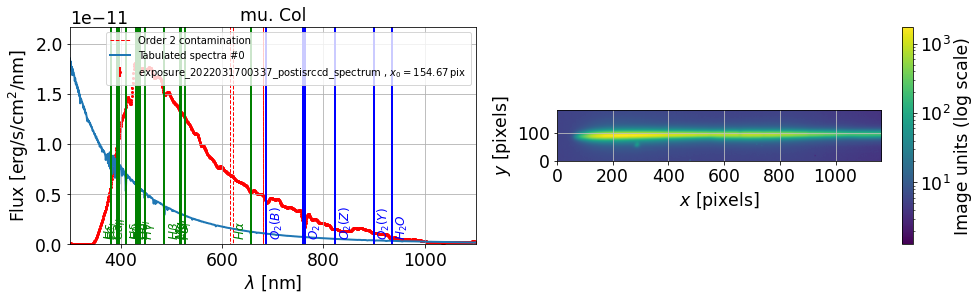

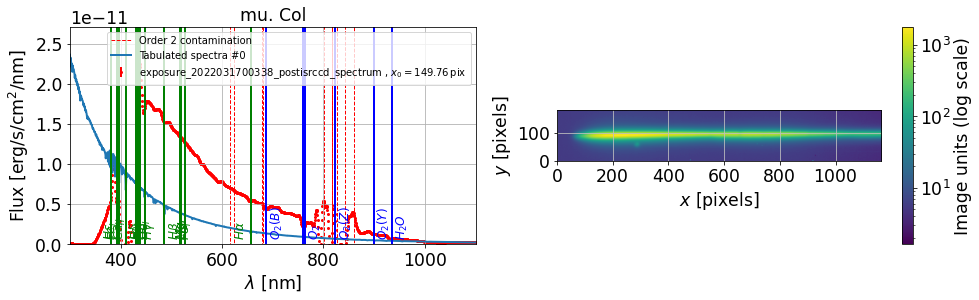

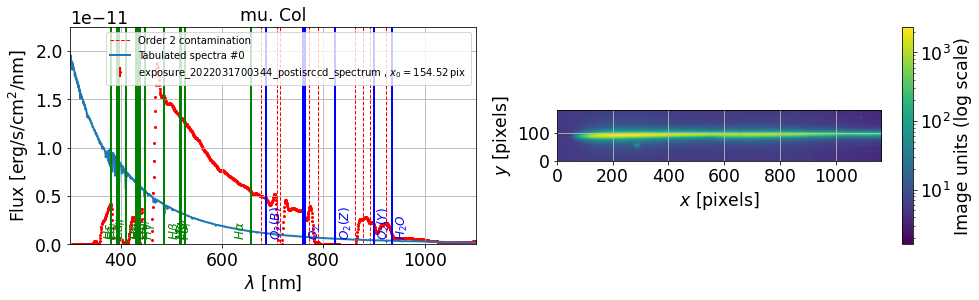

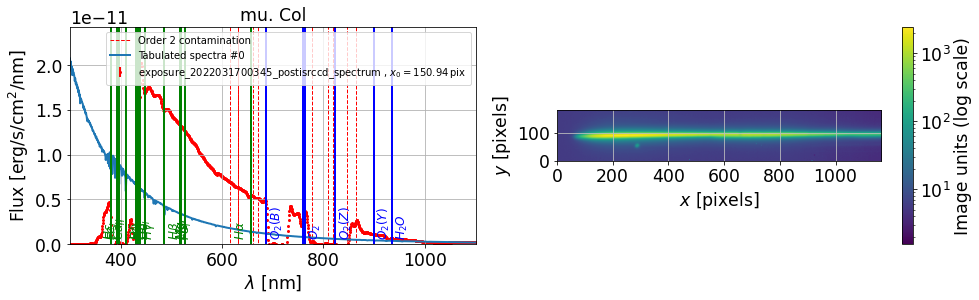

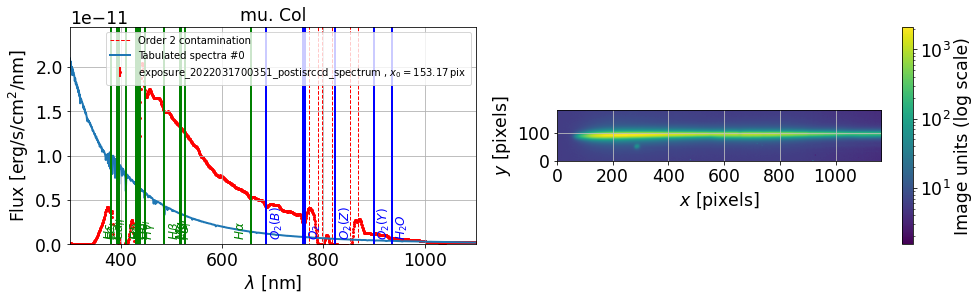

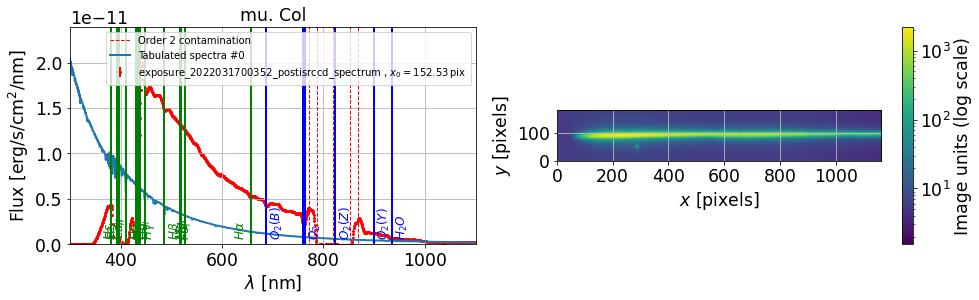

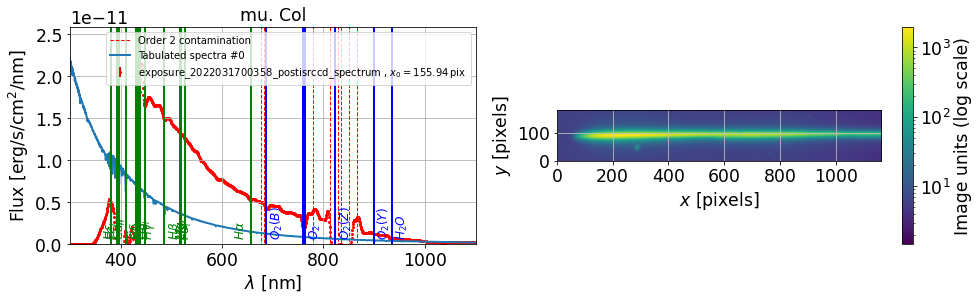

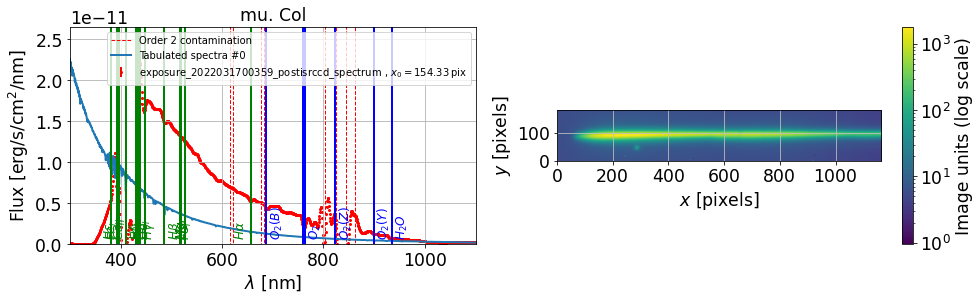

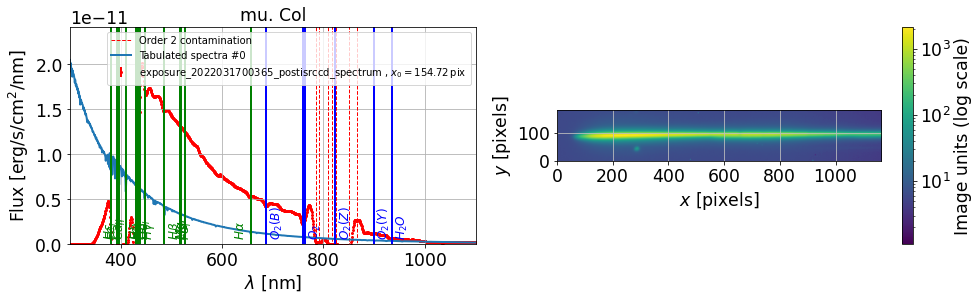

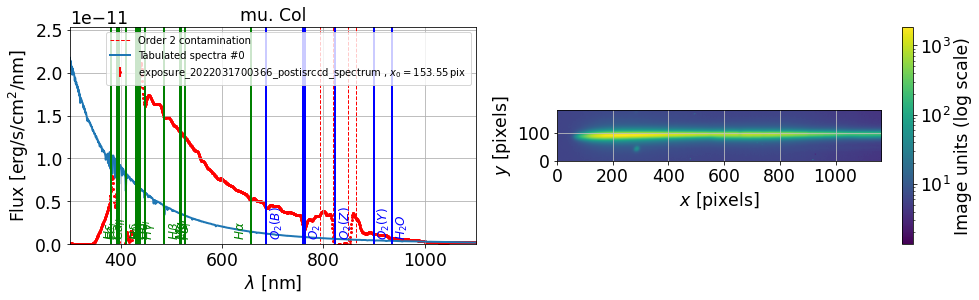

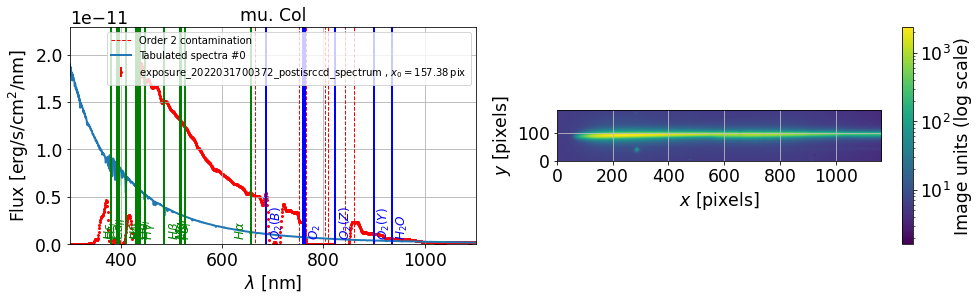

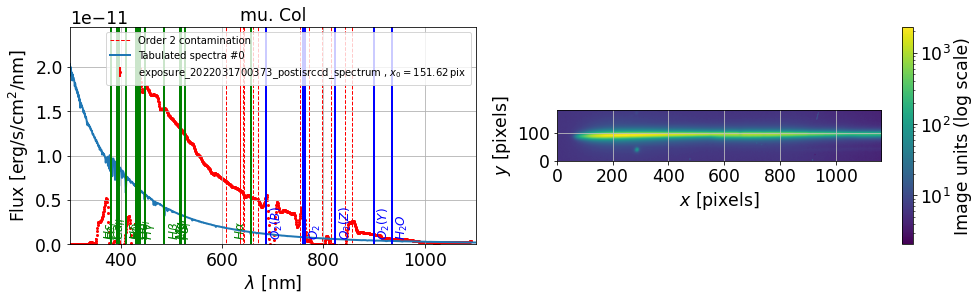

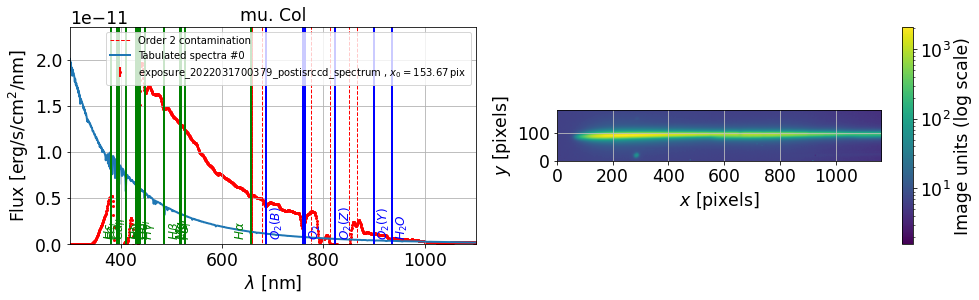

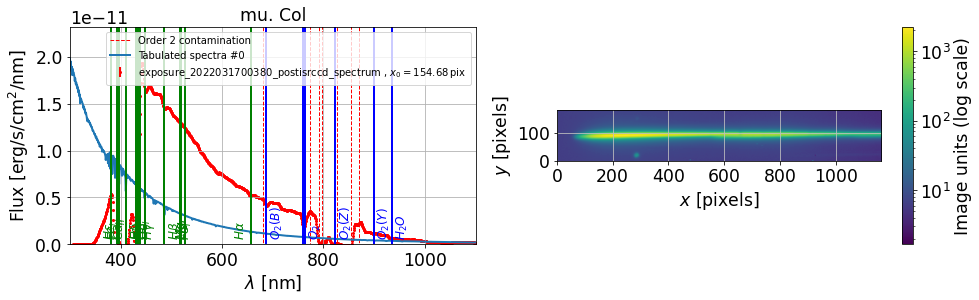

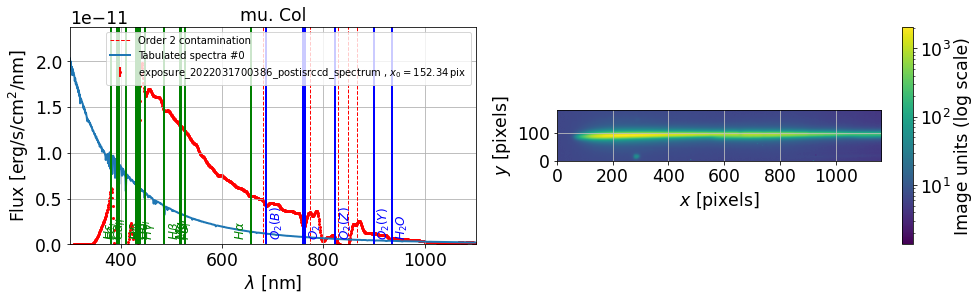

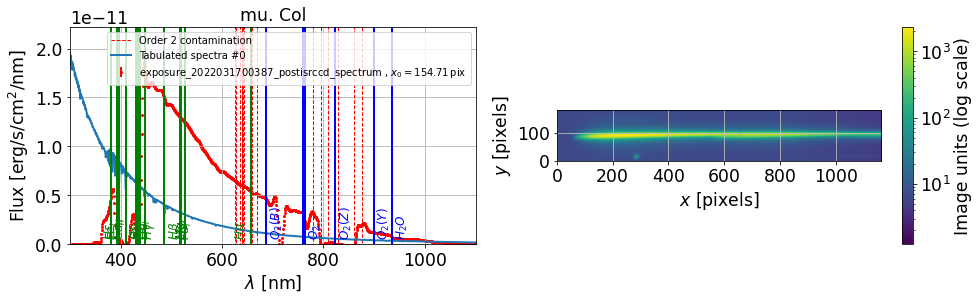

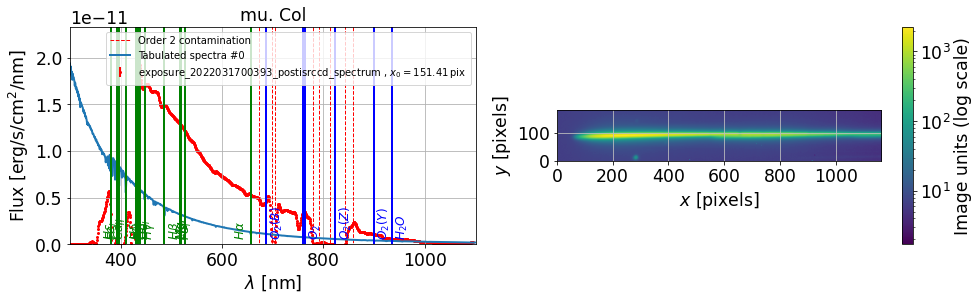

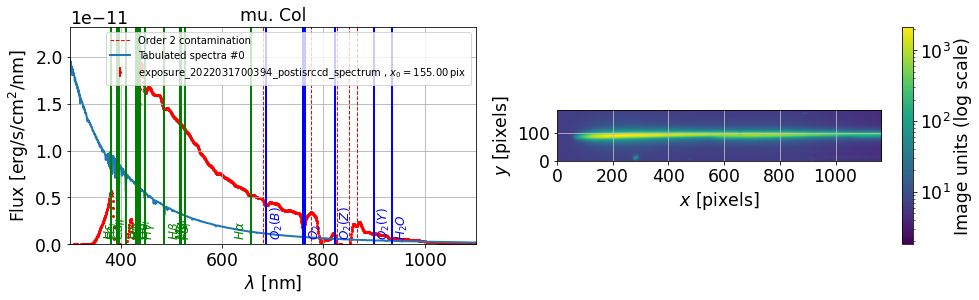

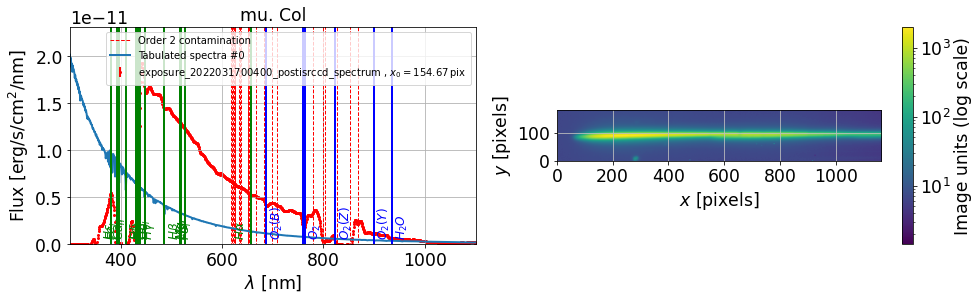

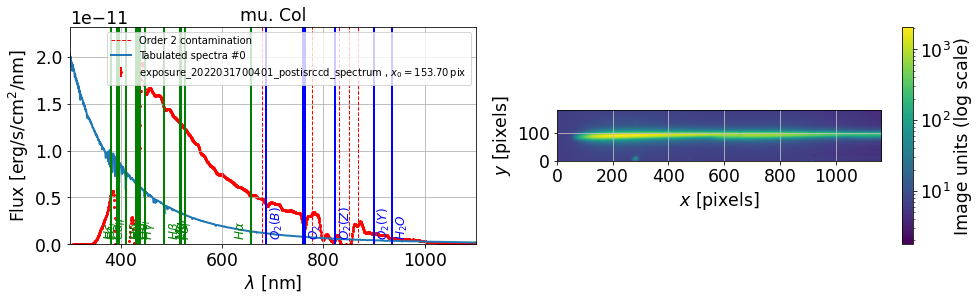

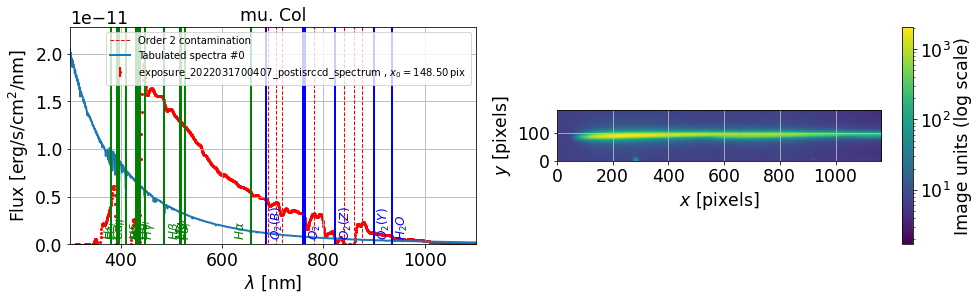

In [44]:
parameters.DISPLAY=True

infos = []
all_lambdas=[]
all_data=[]
all_num=[]

idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    idx+=1
    

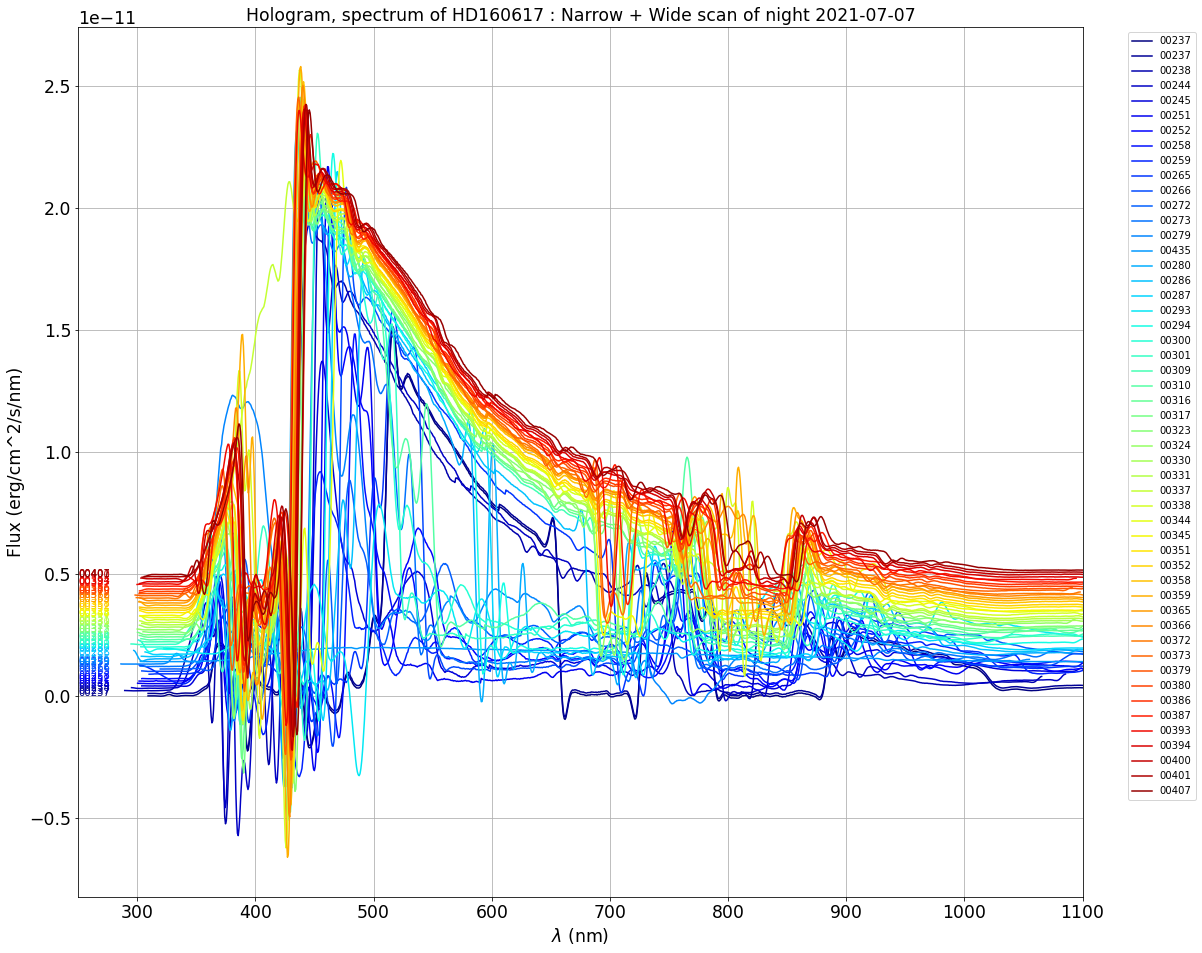

In [45]:
fig=plt.figure(figsize=(18,16))
ax=fig.add_subplot(1,1,1)

idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename= os.path.basename(fullfilename)
         
    #s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    label=all_num[idx]
    
    
    
    delta=idx*1.0e-13
    #delta=0
    
    if label not in ["000284","000276","000289","000291"] :
        ax.plot(all_lambdas[idx],all_data[idx]+delta,label=label,color=all_colors[idx])
        plt.text(250.,all_data[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
    
    idx+=1
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("Flux (erg/cm^2/s/nm)")
ax.set_xlim(250.,1100)
ax.grid()
ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
ax.set_title("Hologram, spectrum of HD160617 : Narrow + Wide scan of night 2021-07-07")
plt.show()
    

# Narrow scan dataset

In [46]:
idx=0
all_num_nr = []
all_lambdas_nr = []
all_data_nr = []

for fullfilename in all_good_spectra_spectrum_files:
    
    
    if all_num[idx] >= '000317':
        all_num_nr.append(all_num[idx])
        all_lambdas_nr.append(all_lambdas[idx]) 
        all_data_nr.append(all_data[idx])
        
    idx+=1
        
    

In [47]:
def PlotSpectra(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum of HD160617 : Narrow  scan of night 2021-07-07", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(14,8)):
    """
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,1,1)
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        if delta !=0:
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(thetitle)
    plt.show()
        
    
    

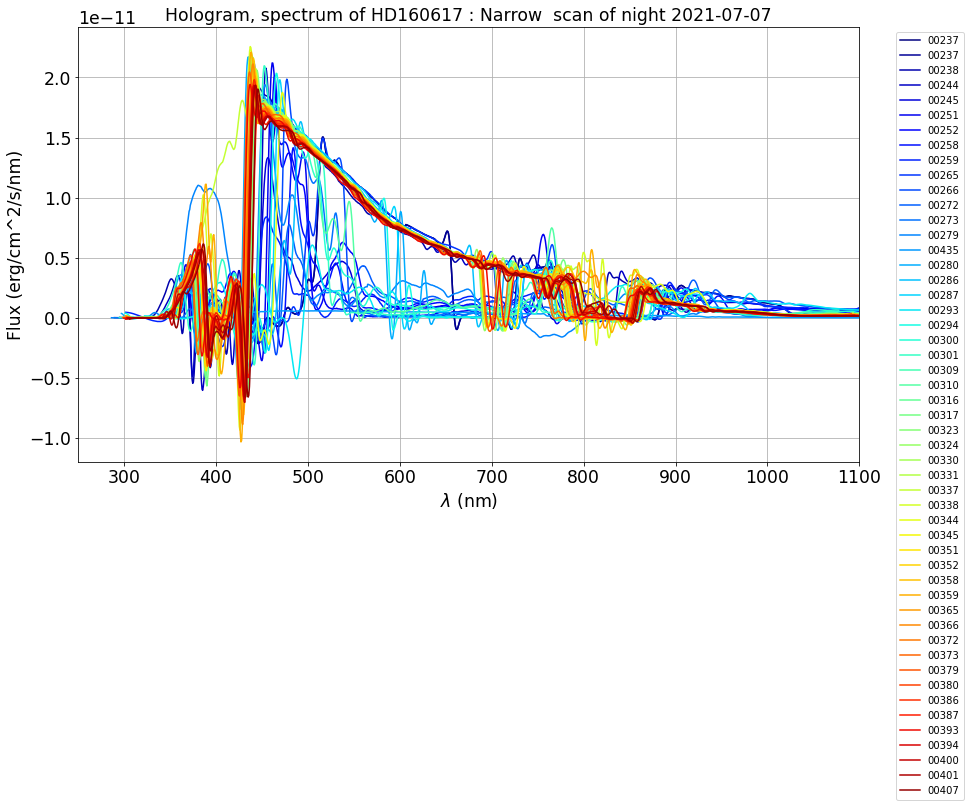

In [48]:
PlotSpectra(all_lambdas_nr,all_data_nr,all_num_nr)

In [49]:
def PlotSpectraBoth(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum of HD160617 : Narrow  scan of night 2021-07-07", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(12,12)):
    """
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    
    gs = gridspec.GridSpec(2, 1,height_ratios=[1, 3] ,figure=fig)
    
    #ax=fig.add_subplot(2,1,1)
    ax=fig.add_subplot(gs[0,0])
    
    idx=0
    delta=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        if delta !=0:
            ax.plot(all_lambdas[idx],all_data[idx]+delta,label=label,color=all_colors[idx])
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
            
        
    #ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title("superimposed spectra")
    
    #ax=fig.add_subplot(2,1,2)
    ax=fig.add_subplot(gs[1,0])
    
    
    idx=0
    for idx in range(NN):
        
        delta=idx*0.5e-13
        
        label=all_tag[idx]
        
        if delta ==0:
            
            ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
        elif delta !=0:
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
            ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    #ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title("shifted spectra")
    
    
    plt.suptitle(thetitle,y=0.95,fontsize=20,fontweight="bold")
    #plt.tight_layout()
    plt.show()
        
    
    

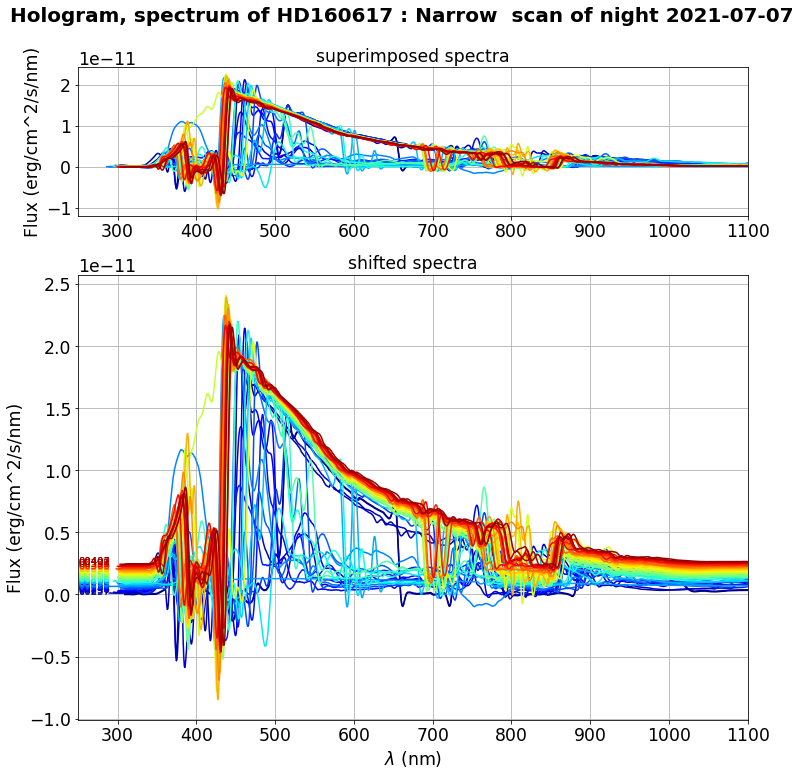

In [50]:
PlotSpectraBoth(all_lambdas_nr,all_data_nr,all_num_nr)